In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, TimeDistributed, Masking
from tensorflow.keras.optimizers import Adam
import h5py
import matplotlib.pyplot as plt
import numpy.ma as ma

In [2]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,12)
figure(figsize=(100, 80), dpi=80)

<Figure size 8000x6400 with 0 Axes>

<Figure size 8000x6400 with 0 Axes>

In [3]:
tf.random.set_seed(12345)

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [5]:
f = h5py.File("autobuses_processed_data.h5","r")
scaled_X = ma.array(f["scaled_x"])
#scaled_X.mask = ma.array(f["x_mask"])
minX = np.array(f["minX"])
maxX = np.array(f["maxX"])
f.close()

In [6]:
scaled_X

masked_array(
  data=[[0.28377141],
        [0.25671227],
        [0.23912387],
        ...,
        [0.3782139 ],
        [0.34551843],
        [0.35473516]],
  mask=False,
  fill_value=1e+20)

In [7]:
def inverse_scaler(scaled_x,minX,maxX):
    return scaled_x*maxX-minX

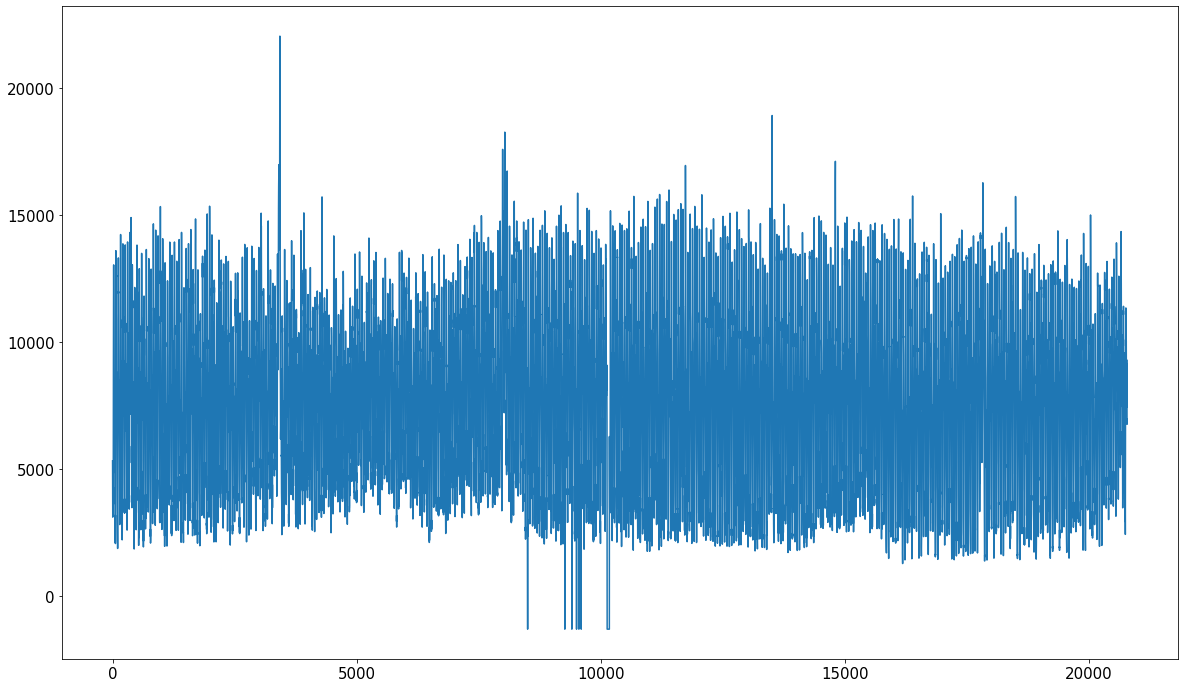

In [8]:
plt.plot(inverse_scaler(scaled_X,minX,maxX))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('data.jpg')
plt.show()

In [9]:
int(0.25*len(scaled_X))

5196

In [10]:
def partitionSet(test_fraction, data, partition):
    lenX = len(data)
    test_size = int(len(data) * test_fraction)
    test_df = data[int((partition/100)*lenX):int((partition/100)*lenX)+test_size]
    train_df = ma.vstack((data[:int((partition/100)*lenX)-1],data[int((partition/100)*lenX)+test_size:]))
    train_df[int((partition/100)*lenX)] = ma.masked
    return train_df, test_df

train_dataf = []
test_dataf = []

[train_df,test_df] = partitionSet(0.25,scaled_X, 73)

In [11]:
timesteps = 24

In [12]:
X_train = ma.array([train_df[t:t+timesteps] for t in range(0, len(train_df)-timesteps)])
y_train = train_df[timesteps:, :]
X_test = ma.array([test_df[t:t+timesteps] for t in range(0, len(test_df)-timesteps)]) 
y_test = test_df[timesteps:, :]

In [13]:
def LSTM_function(NCells, timesteps, num_features, dropout, NBEpochs, Batchsize, validationSplit):
    model = Sequential()
    model.add(Masking(mask_value=0., input_shape=(timesteps, num_features)))
    model.add(LSTM(1, activation = 'tanh', input_shape = (timesteps, num_features), return_sequences=True))
    #model.add(Dropout(dropout))
    model.add(LSTM(NCells))
    #model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss = 'mse', optimizer='adam')
    X_ = ma.filled(X_train,0)
    Y_ = ma.filled(y_train,0)
    MODEL = model.fit(X_, Y_, epochs = NBEpochs, batch_size = Batchsize,
                      validation_split = validationSplit, shuffle = False)
    return model, MODEL

In [14]:
X_train.shape[1]

24

In [16]:
model, MODEL = LSTM_function(64, X_train.shape[1], 1, 0.2, 100, 128, 0.2)

Epoch 1/100
98/98 [==============================] - 13s 62ms/step - loss: 0.0247 - val_loss: 0.0170
Epoch 2/100
98/98 [==============================] - 3s 32ms/step - loss: 0.0118 - val_loss: 0.0092
Epoch 3/100
98/98 [==============================] - 3s 32ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 4/100
98/98 [==============================] - 3s 32ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 5/100
98/98 [==============================] - 3s 32ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 6/100
98/98 [==============================] - 3s 33ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 7/100
98/98 [==============================] - 3s 33ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 8/100
98/98 [==============================] - 4s 36ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 9/100
98/98 [==============================] - 4s 38ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 10/100
98/98 [==============================] - 3s 36ms/step - loss: 0.0025 - val_loss: 0.002

98/98 [==============================] - 3s 32ms/step - loss: 8.9041e-04 - val_loss: 8.3061e-04
Epoch 80/100
98/98 [==============================] - 3s 32ms/step - loss: 8.8824e-04 - val_loss: 8.2998e-04
Epoch 81/100
98/98 [==============================] - 3s 32ms/step - loss: 8.8614e-04 - val_loss: 8.2972e-04
Epoch 82/100
98/98 [==============================] - 3s 32ms/step - loss: 8.8408e-04 - val_loss: 8.2980e-04
Epoch 83/100
98/98 [==============================] - 3s 32ms/step - loss: 8.8201e-04 - val_loss: 8.3016e-04
Epoch 84/100
98/98 [==============================] - 3s 32ms/step - loss: 8.7994e-04 - val_loss: 8.3068e-04
Epoch 85/100
98/98 [==============================] - 3s 33ms/step - loss: 8.7782e-04 - val_loss: 8.3115e-04
Epoch 86/100
98/98 [==============================] - 3s 33ms/step - loss: 8.7567e-04 - val_loss: 8.3139e-04
Epoch 87/100
98/98 [==============================] - 3s 31ms/step - loss: 8.7346e-04 - val_loss: 8.3143e-04
Epoch 88/100
98/98 [============

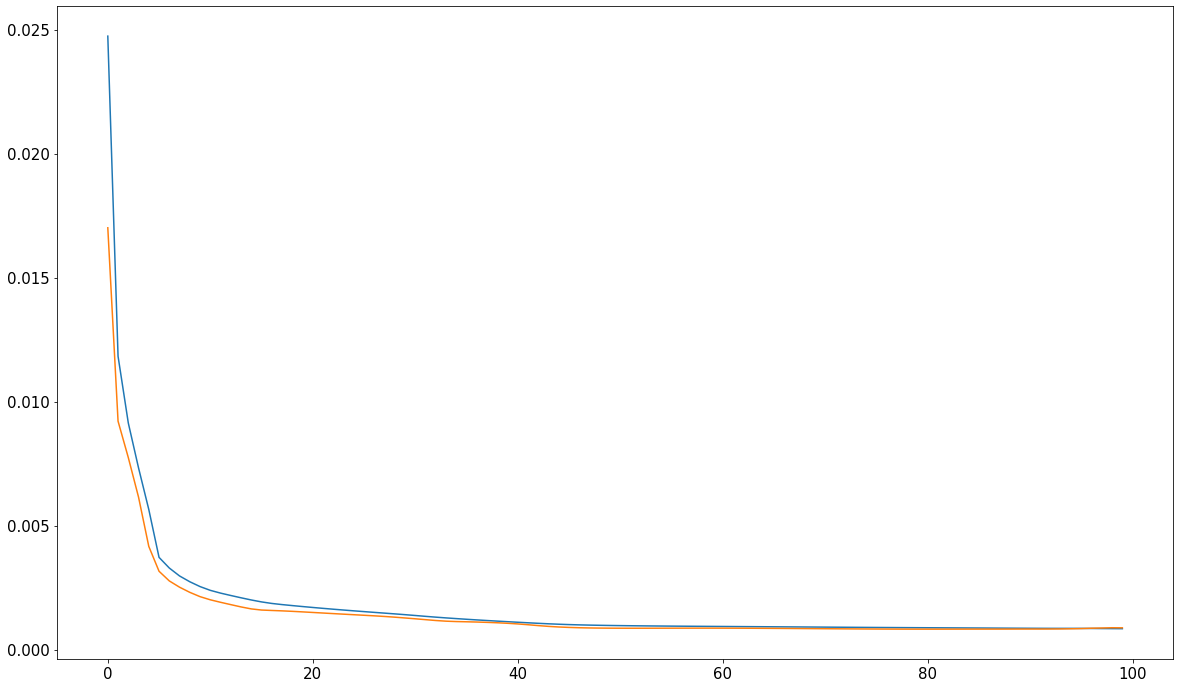

In [17]:
plt.plot(MODEL.history['loss'])
plt.plot(MODEL.history['val_loss'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
prediction_test = model.predict(X_test)

In [19]:
prediction_train = model.predict(X_train)

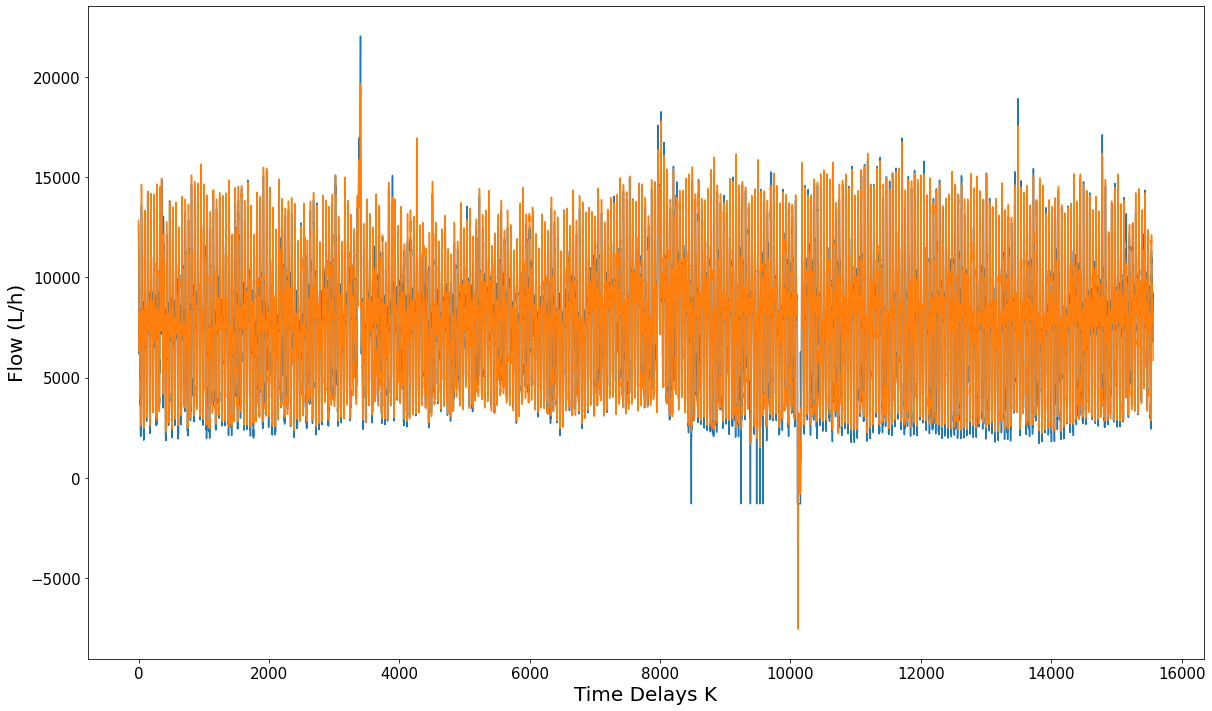

In [20]:
plt.plot(inverse_scaler(y_train[:,0],minX,maxX))
plt.plot(inverse_scaler(prediction_train[:,0],minX,maxX))
plt.xlabel('Time Delays K', fontsize = 20)
plt.ylabel('Flow (L/h)', fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

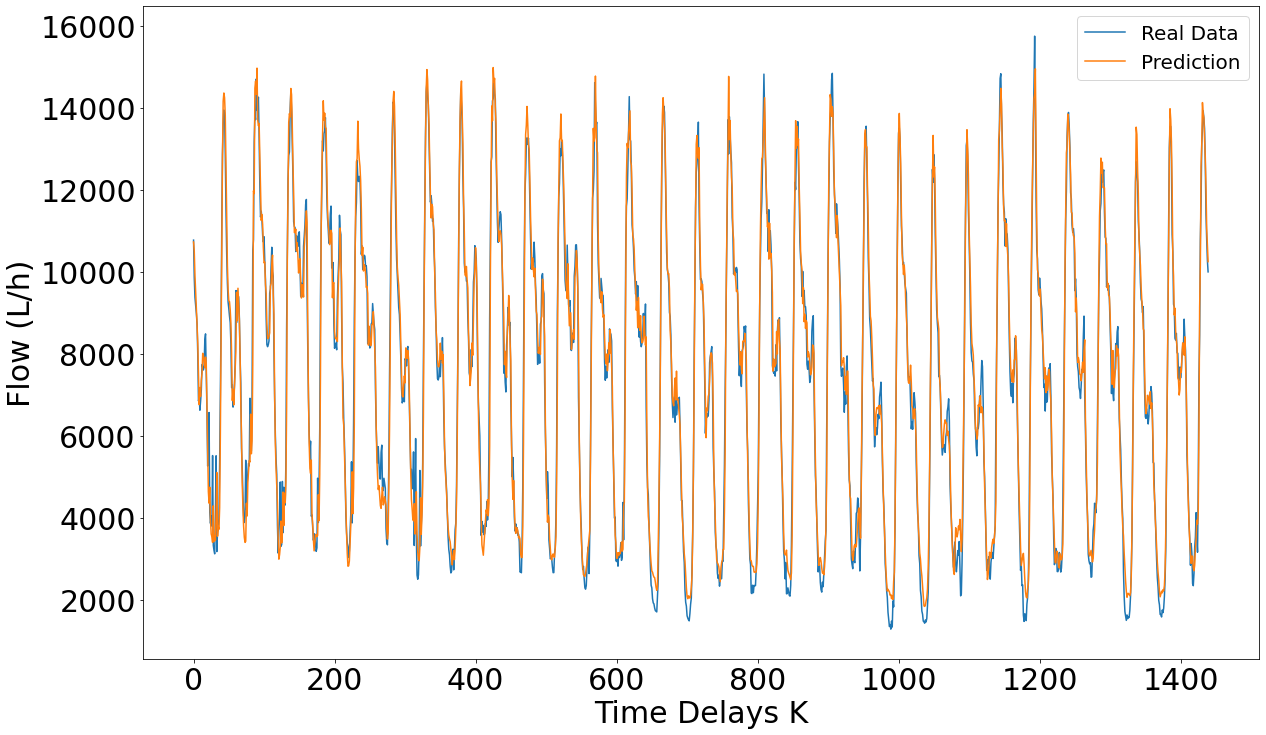

In [21]:
plt.plot(inverse_scaler(y_test[:1440][:,0],minX,maxX), label = 'Real Data')
plt.legend(loc='best', fontsize = 20)
plt.plot(inverse_scaler(prediction_test[:1440][:,0],minX,maxX), label = 'Prediction')
plt.legend(loc='best', fontsize = 20)
plt.xlabel('Time Delays K', fontsize = 30)
plt.ylabel('Flow (L/h)', fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('PredictionOnLastPartition.jpg')
plt.show()

In [22]:
inputs = scaled_X[len(scaled_X) - len(test_df) - timesteps:]

In [23]:
inputs

masked_array(
  data=[[0.19420456],
        [0.17255685],
        [0.1938408 ],
        ...,
        [0.3782139 ],
        [0.34551843],
        [0.35473516]],
  mask=False,
  fill_value=1e+20)

In [24]:
inputs = inputs.reshape(-1,1)

In [25]:
X_test = []

In [26]:
for i in range(24, 360):
    X_test.append(inputs[i-timesteps:i,0])

In [27]:
X_test = np.array(X_test)

In [28]:
X_test.shape

(336, 24)

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
predicted_demand = model.predict(X_test)

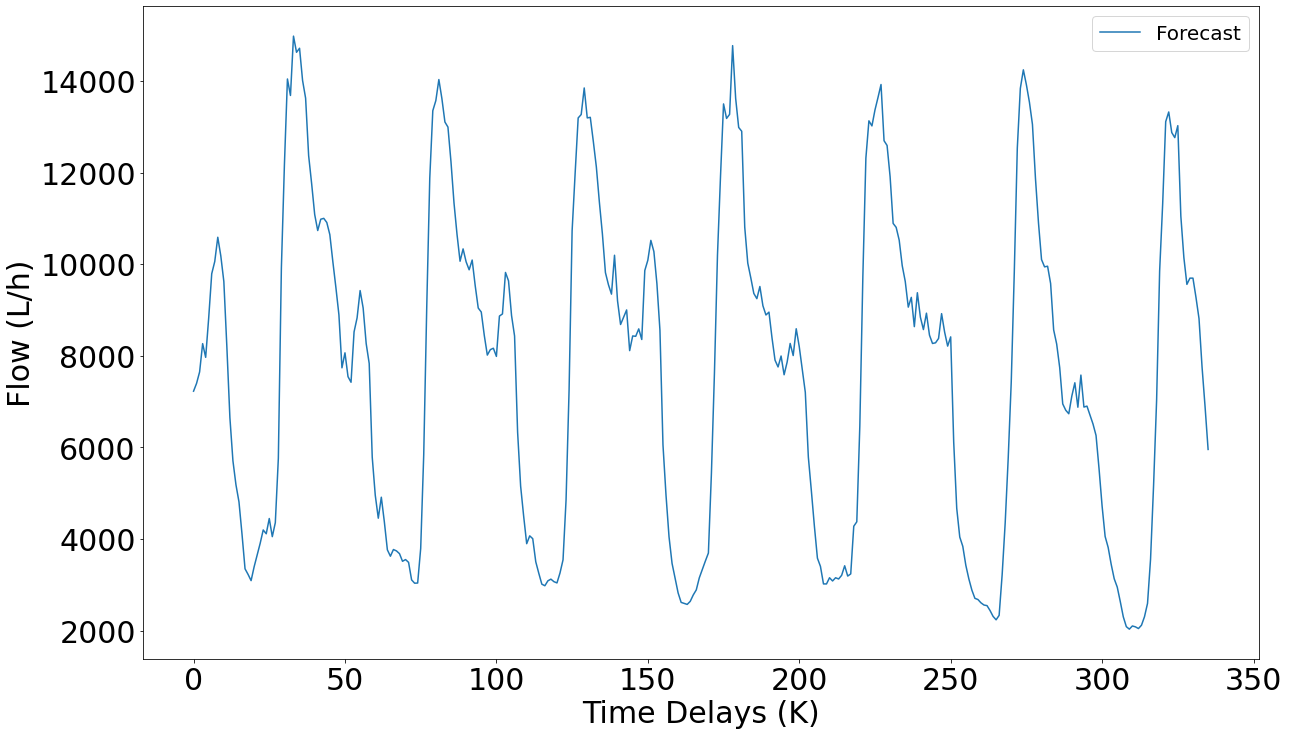

In [32]:
plt.plot(inverse_scaler(predicted_demand, minX, maxX), label = 'Forecast')
plt.legend(loc = 'best', fontsize=20)
plt.xlabel('Time Delays (K)', fontsize = 30)
plt.ylabel('Flow (L/h)', fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('prediction.jpg')